### Crear lista de archivos T1.tsv a analizar en BASH (sustituir luego por final.revised, etc)

find . -name T1.tsv > lista

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from  itertools import chain

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.width = 0

In [2]:
#Concatenar todos los tsv que genera autosnippy

path = r'/media/laura/4T_11/TBDB/*/*/Compare/*/'                            # De cada grupo de N muestras
all_files = glob.glob(os.path.join(path, "*revised.final.tsv"))            # Toma el archivo de SNPs final 
samples   = glob.glob(os.path.join(path, "report_samples.tsv" ))            # Y el de samples (para sacar nº de muestras)

total_vars  = 0
N_vars_total=[]

for f in all_files:
    total_vars = total_vars + (pd.read_csv(f, header=0, sep='\t').shape[0]) # Saca nº filas de cada archivo de SNPs final.revised.tsv
    N_vars_total.append(total_vars)                                         # Y empálmalo con el siguiente
    

Total_N = 0
N_samples=[]

for s in samples:
    Total_N = Total_N + (pd.read_csv(s, header=0, sep='\t').shape[0])       # Saca nº filas de cada archivo de muestras
    N_samples.append(Total_N)                                               # Y empálmalo con el siguiente

N_vars_new=[]
li=[]


for a in all_files:
    col_list = ["Position", "N", "Samples"]
    df = pd.read_csv(a, header=0, sep='\t', usecols=col_list )              # Lee cada archivo de SNPs revised.final.tsv
    
    new = df["Position"].str.split("|", n = 4, expand = True)               # Parsea esto: (MTB_anc|T|7572|C)
    df["Posicion"]=new[2]
    df["Variante"]=new[1] + '-->' + new[3]                                  # Para convertirlo en esto: (7572    T-->C)

    df=df.set_index("Position")
    df=df.sort_index()                                                      # Quiero que los ordene por posición
    #df.drop('Position', inplace=True, axis=1)                               # Elimina el original

    df.columns = df.columns.get_level_values(0)

    li.append(df)                                                           # Genera una lista con cada df en cada vuelta del bucle
    #print(li)
    concatenated_df   = pd.concat(li, axis=1, sort=True)                               # Esto debería empalmar uno con otro, saltando las posiciones comunes pero respetando todas las columnas
   
                                                                             
    #df                = concatenated_df.drop_duplicates(subset=['Position'])
    N_vars_new.append((concatenated_df.shape)[0])                           # Y esto me dice cuántas filas finalmente va teniendo la tabla concatenada


[64, 263, 463, 663, 863, 1054, 1105, 1155, 1205, 1255, 1305, 1355, 1405, 1455, 1505, 1527, 1577, 1627, 1677, 1816, 2016, 2067, 2069, 2269, 2303, 2416, 2540, 2739, 2939, 3139, 3142, 3192, 3242, 3292, 3407, 3463, 3465, 3565, 3765, 3893, 4093, 4293, 4374, 4439, 4639, 4839, 4880, 5080, 5280, 5466, 5650, 5840, 5916, 6106, 6299, 6332]
[11193, 25423, 40026, 56021, 70910, 85080, 94296, 102374, 109363, 118536, 127882, 136893, 147383, 156218, 168104, 173580, 184841, 195436, 205242, 223120, 244123, 252069, 253047, 278137, 286546, 296429, 304510, 334423, 363924, 393350, 395109, 401288, 407236, 412396, 423510, 429636, 430763, 444458, 461601, 483976, 512912, 542232, 553809, 567057, 590793, 612740, 622154, 644285, 666823, 686794, 709734, 739519, 748967, 762223, 776831, 783634]
[11193, 21273, 27775, 33585, 37607, 40978, 45319, 50107, 52905, 57079, 61541, 65348, 70934, 74113, 78863, 80642, 84559, 88622, 92330, 101518, 110627, 113186, 113256, 125742, 127814, 133649, 137280, 153245, 166569, 177484, 17769

Text(0, 0.5, 'Variantes')

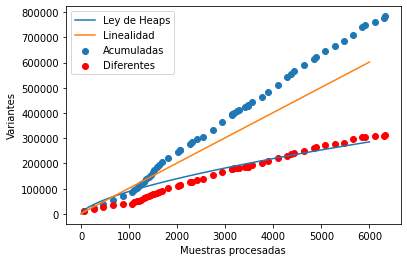

In [3]:
print(N_samples)
print(N_vars_total)
print(N_vars_new)

def heaps_fit(x):
    return 1000 * x**0.65

def lineal(x):
    return 100* x +2000

x_func = np.linspace(0, 6000, 100)
y_func = heaps_fit(x_func)
y_lin  = lineal(x_func)

plt.scatter(N_samples, N_vars_total, marker='o', label='Acumuladas')
plt.scatter(N_samples, N_vars_new, color='r', label='Diferentes')

plt.plot(x_func, y_func, label='Ley de Heaps')
plt.plot(x_func, y_lin, label='Linealidad')

plt.legend()
plt.xlabel("Muestras procesadas")
plt.ylabel("Variantes")

In [4]:
#print(all_files)

In [5]:
N_total=concatenated_df.sum(axis=1)
concatenated_df.head(9)

,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante,N,Samples,Posicion,Variante
MTB_anc|AAAAAGCATTGCCGCATACCACGTTGTCATCGGCGGCTGG|3854104|A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,ERR2517349,3854104,AAAAAGCATTGCCGCATACCACGTTGTCATCGGCGGCTGG-->A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MTB_anc|AAAACCGGG|2256546|A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,ERR2514757,2256546,AAAACCGGG-->A,1.0,ERR2514628,2256546,AAAACCGGG-->A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,SRR6367396,2256546,AAAACCGGG-->A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MTB_anc|AAAATATG|3811654|A,1.0,ERR2516127,3811654,AAAATATG-->A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
Muestras_df = concatenated_df.iloc[:, list([i for i,x in enumerate(concatenated_df.columns == 'Samples') if x])]                            # Esto genera un df temporal con las columnas Samples  
Muestras_df['Muestras'] = Muestras_df[Muestras_df.columns[:]].apply(lambda x: ','.join(pd.unique(x.dropna().astype(str))),axis=1)           # Y esto las empalma en una que se llama muestras
Muestras_df.drop('Samples', axis=1, inplace=True)                                                                                           # Y esto borra las originales


/home/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/laura/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
Variantes_df = concatenated_df.iloc[:, list([i for i,x in enumerate(concatenated_df.columns == 'Variante') if x])]                        # Esto genera un df temporal con las columnas Variante  
Variantes_df['SNP'] = Variantes_df[Variantes_df.columns[:]].apply(lambda x: ','.join(pd.unique(x.dropna().astype(str))),axis=1)           # Y esto las empalma en una que se llama muestras
Variantes_df.drop('Variante', axis=1, inplace=True)                                                                                       # Y esto borra las originales
Variantes_df.head(3)

/home/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SNP
MTB_anc|AAAAAGCATTGCCGCATACCACGTTGTCATCGGCGGCTGG|3854104|A,AAAAAGCATTGCCGCATACCACGTTGTCATCGGCGGCTGG-->A
MTB_anc|AAAACCGGG|2256546|A,AAAACCGGG-->A
MTB_anc|AAAATATG|3811654|A,AAAATATG-->A


In [8]:
Pos_df = concatenated_df.iloc[:, list([i for i,x in enumerate(concatenated_df.columns == 'Posicion') if x])]                        # Esto genera un df temporal con las columnas Variante  
Pos_df['Pos'] = Pos_df[Pos_df.columns[:]].apply(lambda x: ','.join(pd.unique(x.dropna().astype(str))),axis=1)                       # Y esto las empalma en una que se llama muestras
Pos_df.drop('Posicion', axis=1, inplace=True)                                                                                       # Y esto borra las originales
Pos_df.head(3)

/home/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pos
MTB_anc|AAAAAGCATTGCCGCATACCACGTTGTCATCGGCGGCTGG|3854104|A,3854104
MTB_anc|AAAACCGGG|2256546|A,2256546
MTB_anc|AAAATATG|3811654|A,3811654


In [9]:
result= pd.concat([Pos_df, Variantes_df, Muestras_df, N_total], axis=1)

In [10]:
result['Pos'] = result['Pos'].astype(int)
result = result.sort_values(by=['Pos'])
result.columns=['Posición', 'Variante', 'Muestras', 'N total']

In [11]:
result.head(10)

,Posición,Variante,Muestras,N total
MTB_anc|A|8|C,8,A-->C,"SRR12882690,SRR12882692",2.0
MTB_anc|A|11|C,11,A-->C,ERR2517569,1.0
MTB_anc|G|16|T,16,G-->T,SRR12882467,1.0
MTB_anc|C|27|T,27,C-->T,SRR12882040,1.0
MTB_anc|C|29|G,29,C-->G,ERR2517224,1.0
MTB_anc|A|31|G,31,A-->G,"ERR2517515,ERR2517589,ERR2517418,ERR2517627,ER...",5.0
MTB_anc|G|45|A,45,G-->A,ERR3077969,1.0
MTB_anc|G|64|C,64,G-->C,ERR2516665,1.0
MTB_anc|G|67|A,67,G-->A,SRR6339646,1.0
MTB_anc|C|71|T,71,C-->T,"SRR12882467,ERR2516558,ERR2516538,ERR2516462,E...",18.0


array([[<AxesSubplot:title={'center':'Posición'}>]], dtype=object)

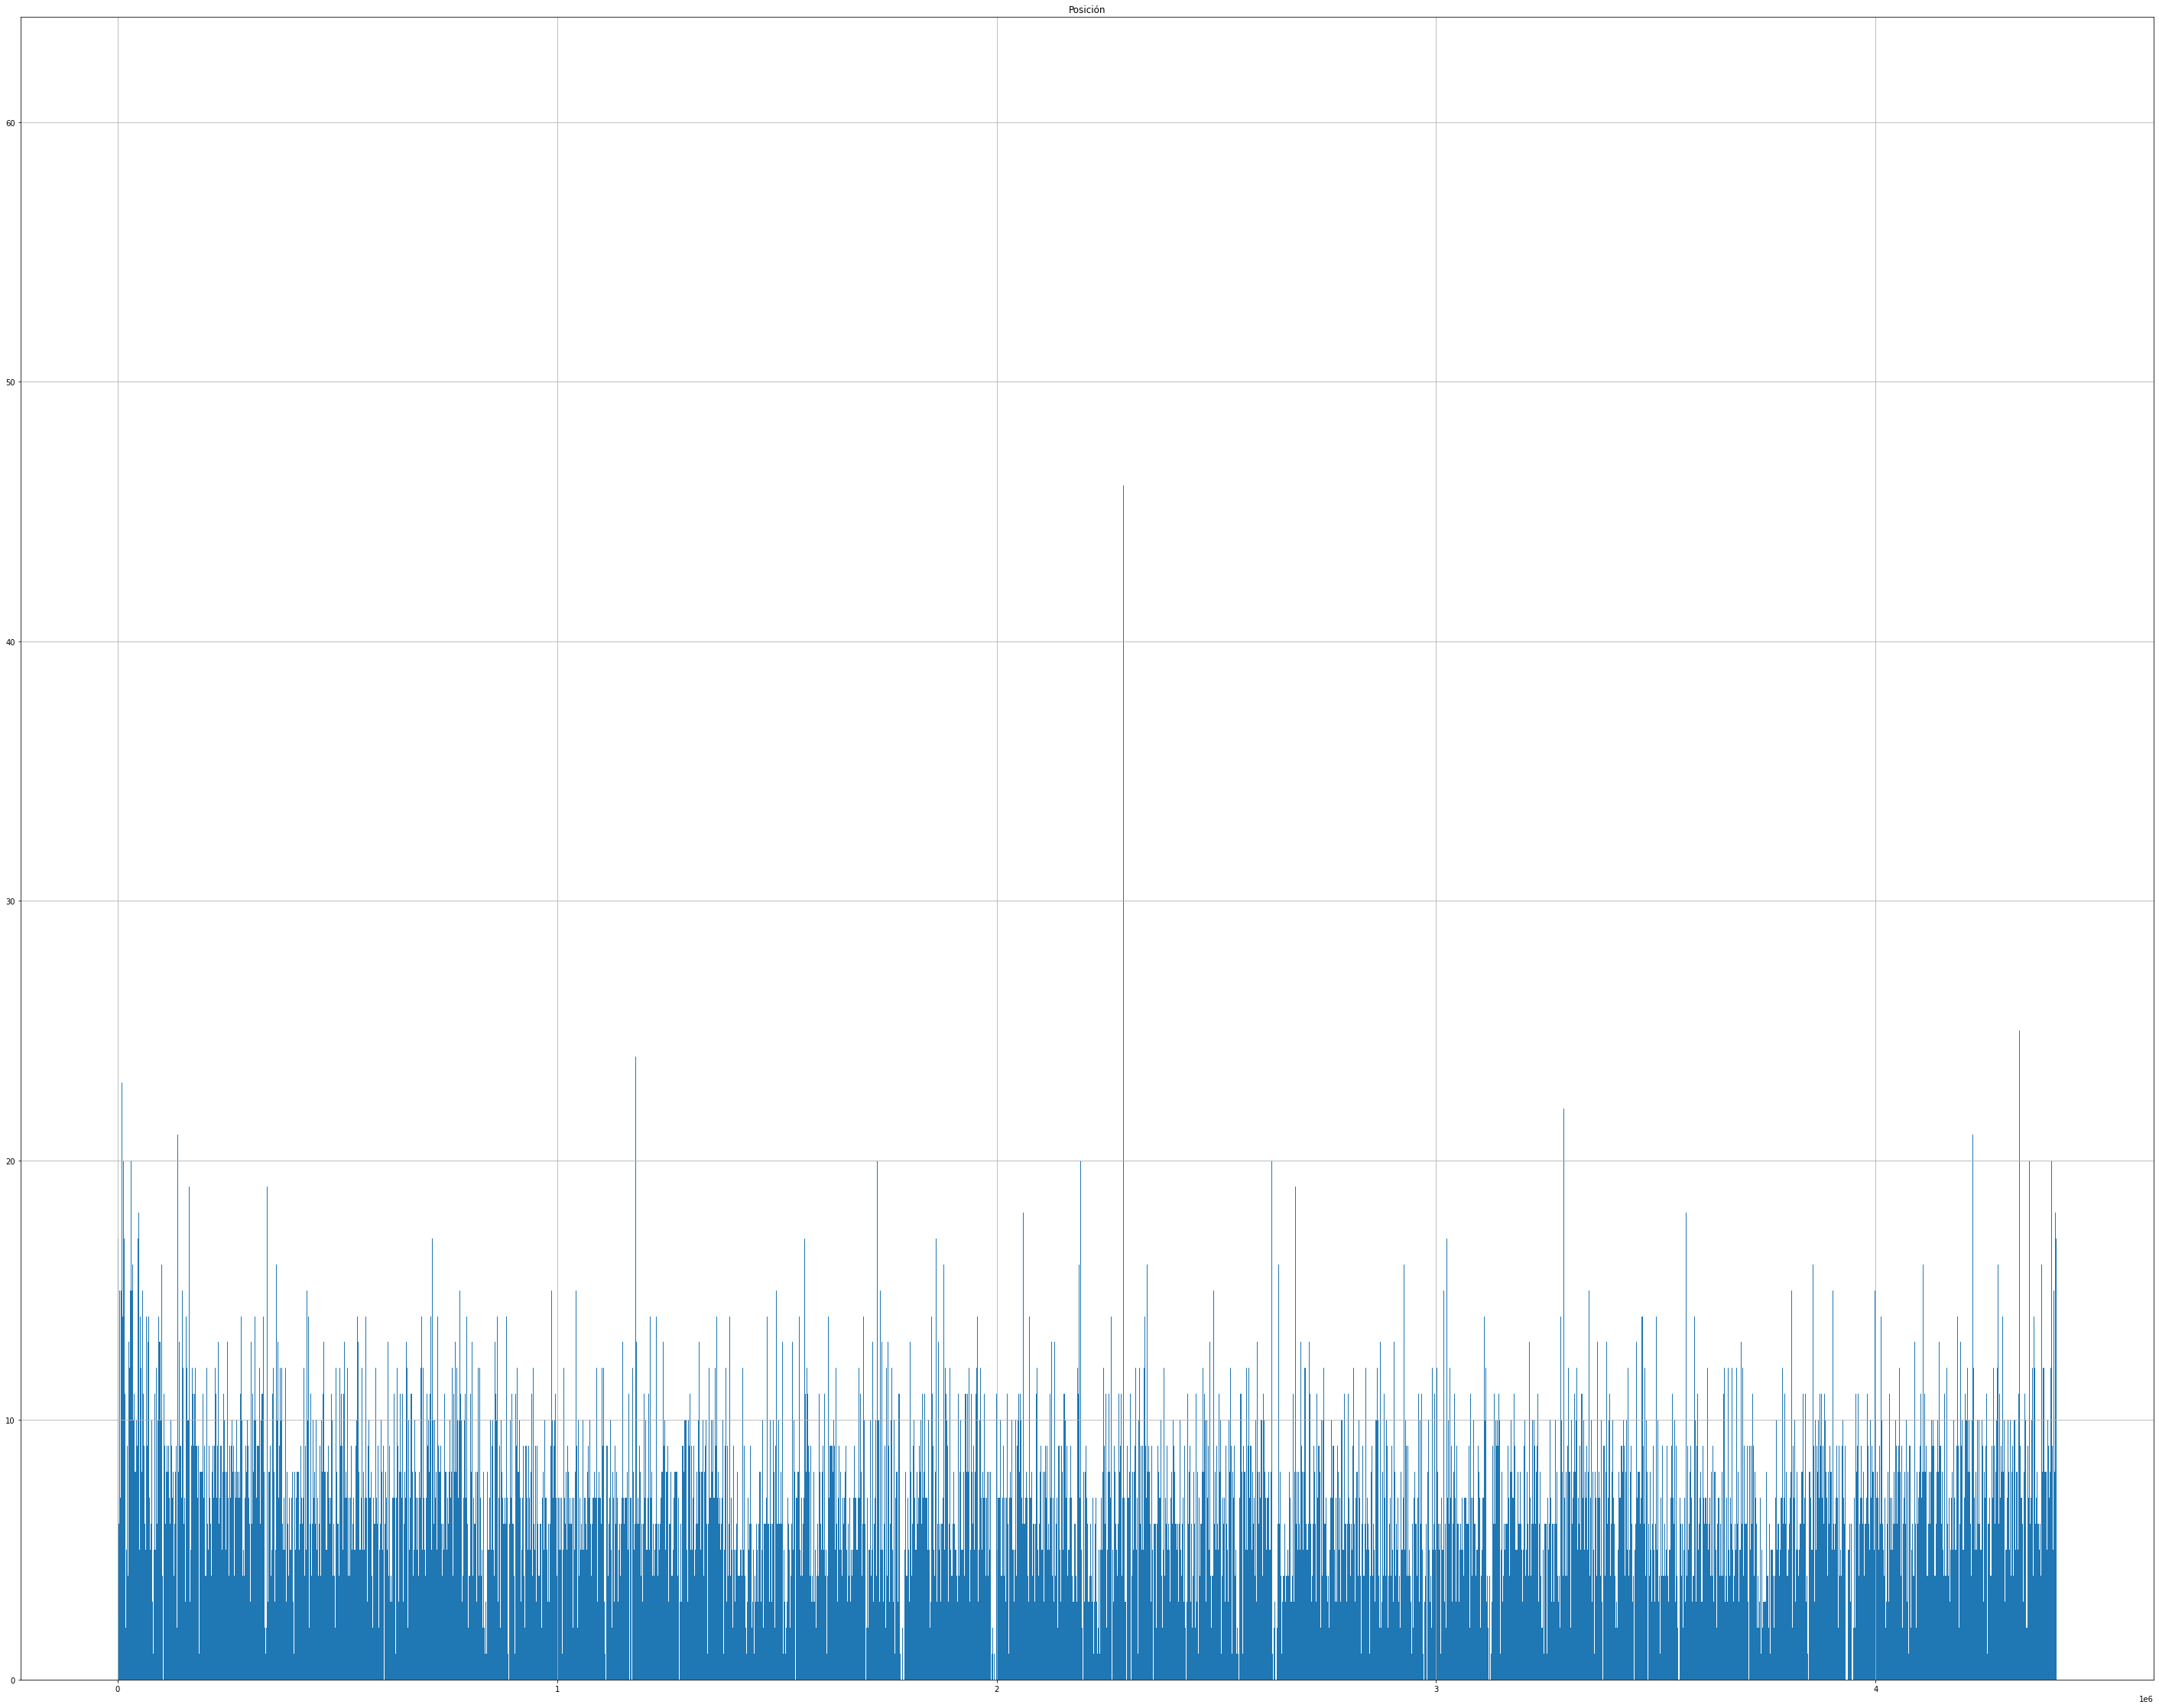

In [12]:
# Histograma ocurrencias por intervalo cromosómico de 10o pb

result.hist(column="Posición", bins=44000, figsize=(50, 40))

array([[<AxesSubplot:title={'center':'Posición'}>]], dtype=object)

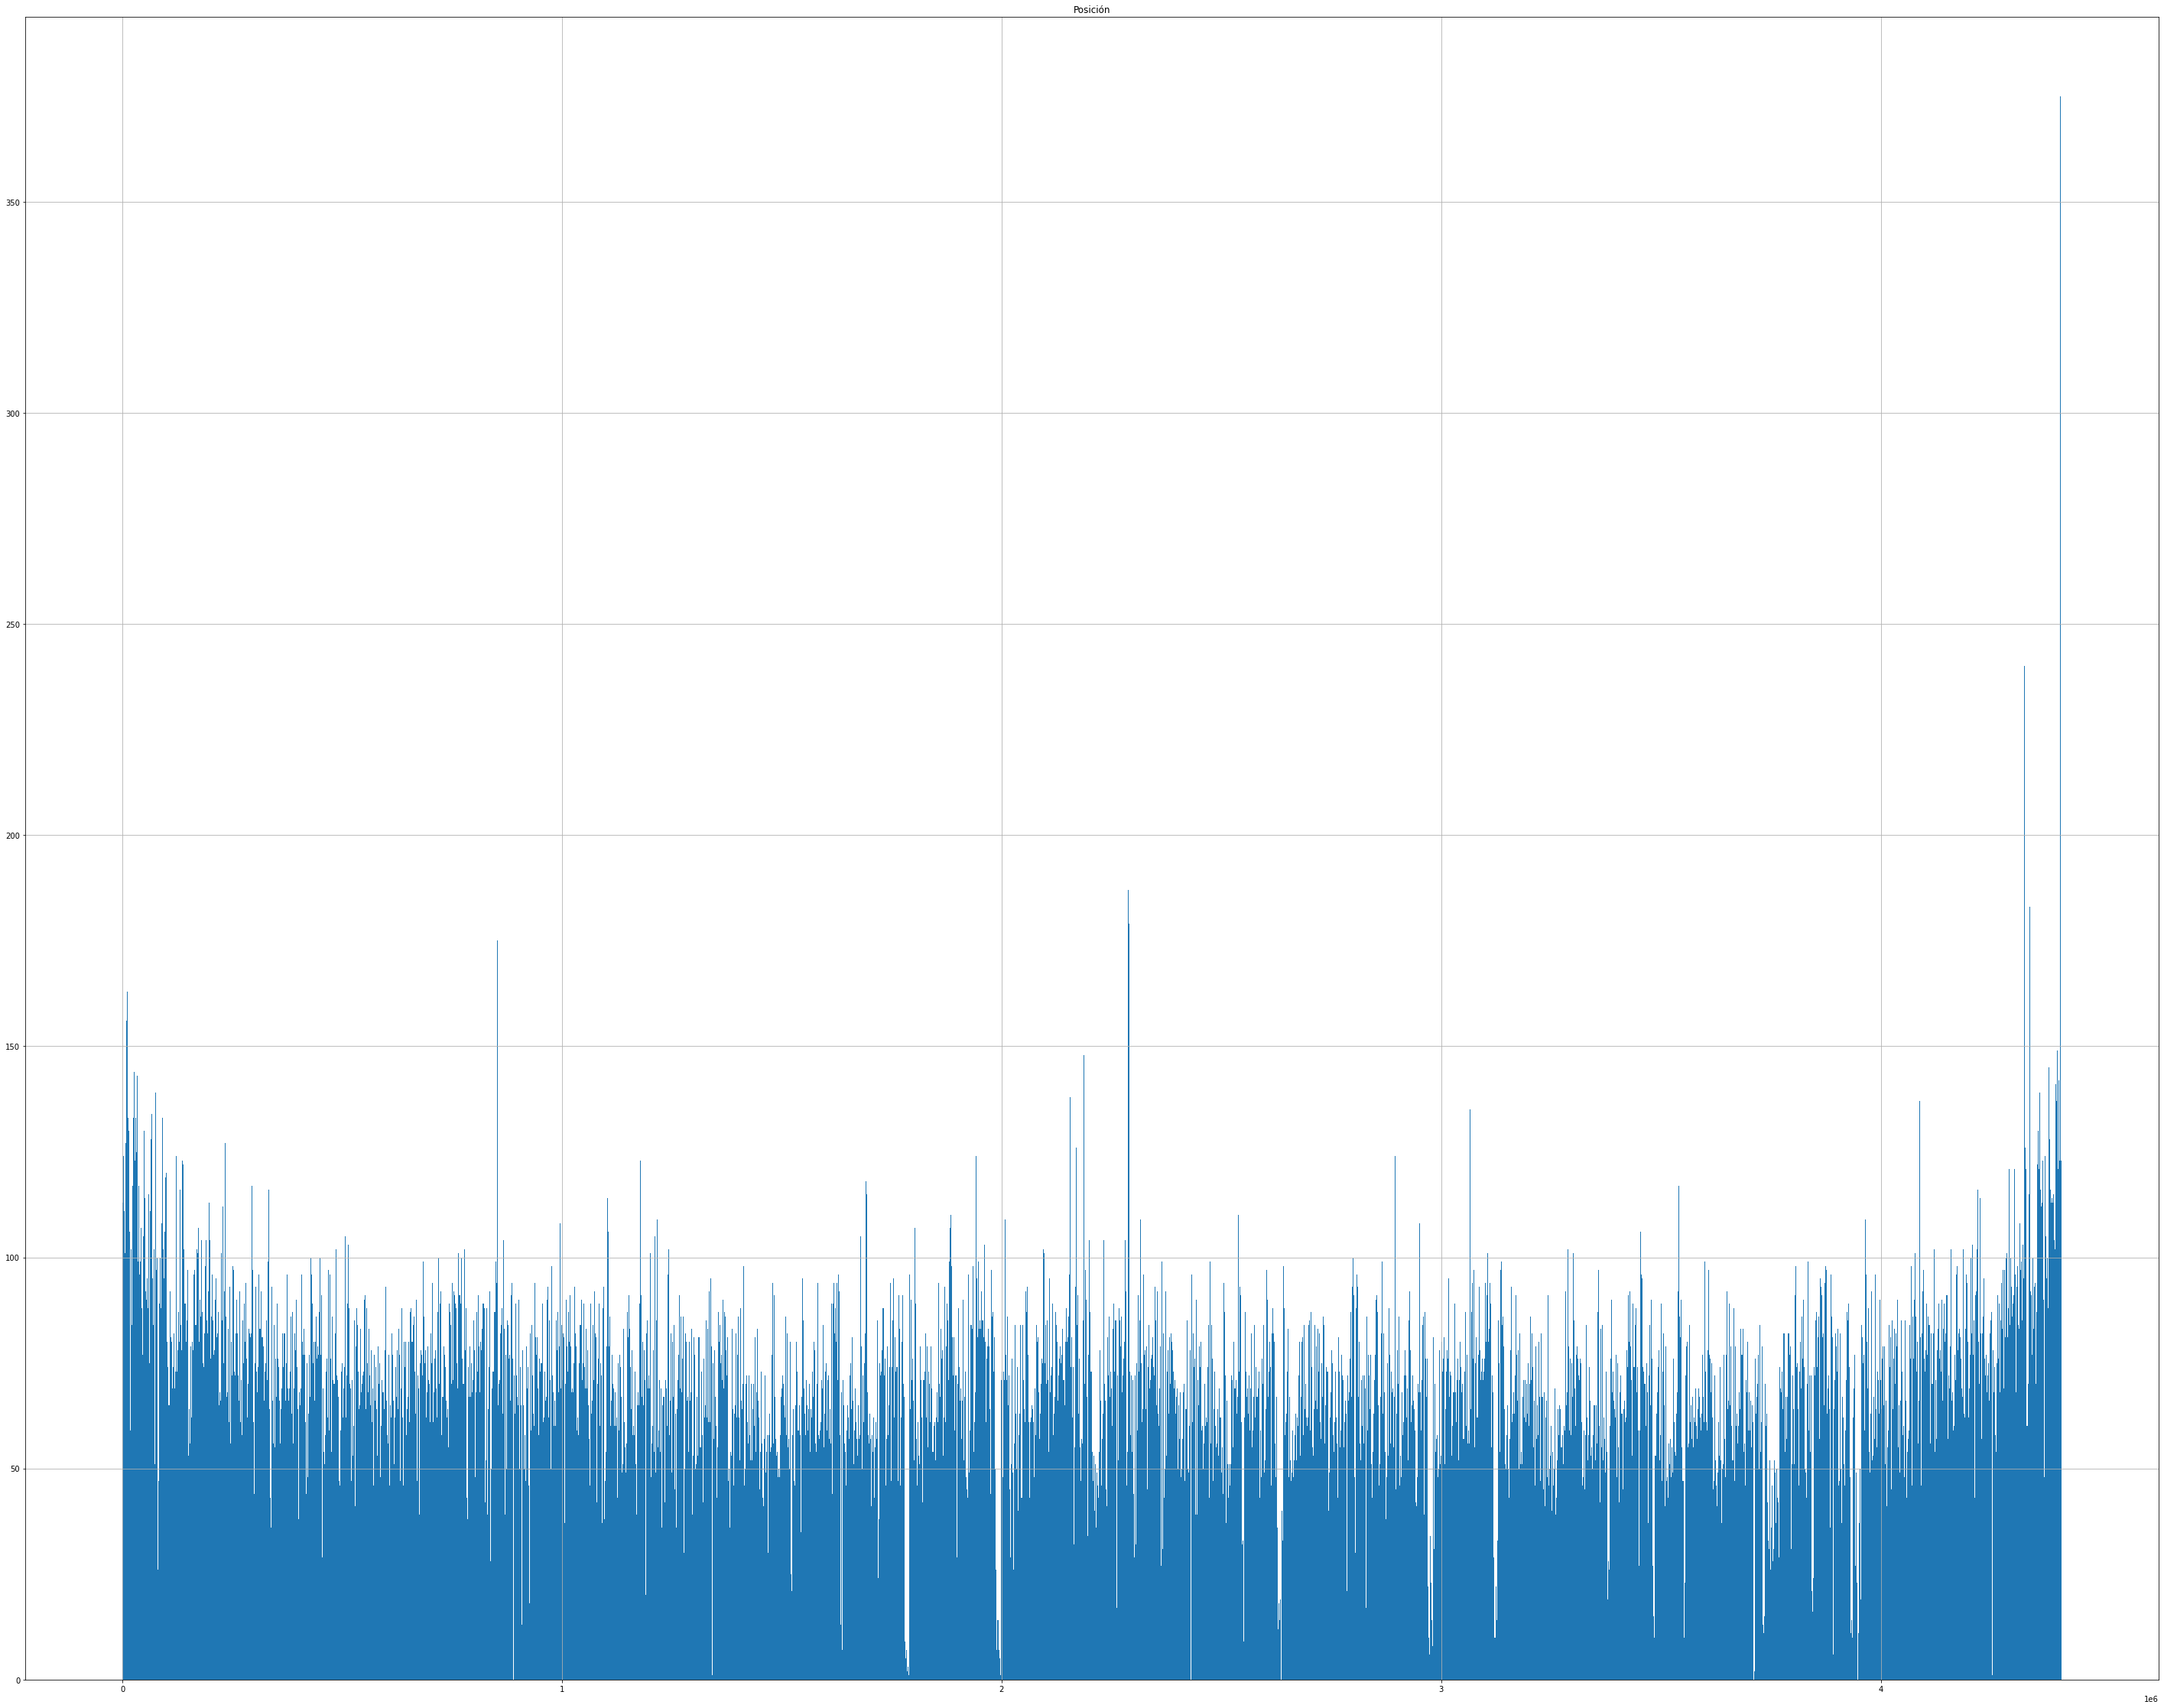

In [13]:
result.hist(column="Posición", bins=4400, figsize=(50, 40))

In [14]:
# Coger SNPs por regiones de 100 pb y ver stats (Distribución, promedio, outliers...)



In [15]:
# Generamos diccionarios AbR y linaje

path_ann  = r'/media/laura/4T_11/TBDB/*/*/Annotation/user/'
ann_files = glob.glob(os.path.join(path_ann, "*.tsv"))         #Toma el archivo de anotaciones de cada muestra
Dic_lin={}
Dic_res={}

for f in ann_files:

    col_list = ["Lineages_col", "resistance_h37rv"]            #Solo nos interesan las cols de linaje y resistencia
    ann   = pd.read_csv(f, sep='\t', usecols=col_list)         #Abrimos cada tsv tomando esas columnas
    ann.replace(r'^\s*$', 'nan', regex=True)                   #Sustituimos valores vacíos por nans

    f=f.strip('.tsv').split(r'/')[-1]                          #Parseamos el nombre de la muestra
    
    lineage=list(set(ann.Lineages_col))                        #Tomamos valores únicos de linaje o resist
    resist =list(set(ann.resistance_h37rv))
    
    lineage=[x for x in lineage if str(x) != 'nan']            #Saca una lista con los lineages asociados a cada muestra
    
    if len(lineage)>0:
        lineage=max(lineage)                                   #De ellos, tomamos el más largo (porque lo normal es que salgan 4, 4.1, 4.1.1...)
        Dic_lin[f]=lineage                                     #Generamos el diccionario de muestra: linaje
    else:
        pass
                        
    resist= [x for x in resist if str(x) != 'nan']             #Y hacemos una lista de resistencias
    
    if len(resist)>0:
        Dic_res[f]=resist
    else:
        Dic_res[f]="na"                                           
                                                               #Y generamos el de resistencias, que debería ir en otra columna, las resist irán en set para evitar redundancias


#result['Linaje']                =result['Muestras'].map(Dic_lin)
#result['Resistencias asociadas']=result['Muestras'].map(Dic_res) #No soy capaz de que lo aplique cuando hay varias muestras en una fila, saca NaN 
#result = pd.concat([result,pd.DataFrame(result.Muestras.map(Dic_lin).tolist(), columns=['Linaje'])], axis=1)
#a lo mejor funciona un apply (map(dic) for x in row...)

#result.head(100)


In [16]:
#print(Dic_lin)

In [17]:
result.reset_index(inplace=True)
result.columns=['SNP', 'Posición', 'Variante', 'Muestras', 'N total']

In [18]:
df_linajes = pd.DataFrame.from_dict(Dic_lin, orient='index', columns=['linaje'])
df_linajes.reset_index(inplace=True)
df_linajes.columns=['Muestra','linaje']
df_linajes.head()

,Muestra,linaje
0,ERR2516130,lineage3
1,ERR2516154,lineage4.1.2.1
2,ERR2516147,lineage4.5
3,ERR2516162,lineage4.1
4,ERR2516117,lineage4.3.2


In [19]:
df_resistencias = pd.DataFrame.from_dict(Dic_res, orient='index', columns=['resistencia'])
df_resistencias.reset_index(inplace=True)
df_resistencias.columns=['Muestra','resistencia']
df_resistencias.head(10)

,Muestra,resistencia
0,ERR2516130,na
1,ERR2516154,na
2,ERR2516147,na
3,ERR2516162,na
4,ERR2516117,[streptomycin (SM)]
5,ERR2516124,[streptomycin (SM)]
6,ERR2516106,na
7,ERR2516161,"[isoniazid (INH)*, amikacin (AMK) kanamycin (K..."
8,ERR2516131,na
9,ERR2516129,"[isoniazid (INH)*, rifampicin (RMP)*]"


In [20]:
result['Linajes'] = (result['Muestras'].str.split(',')                                             #Esto separa cada muestra
                                     .explode()                                                    #Esto divide la celda en varias filas (con el mismo indice)
                                     .map(df_linajes.assign(index=df_linajes.Muestra.astype(str))  #Esto asigna a cada muestra el valor de su linaje
                                     .set_index('Muestra')['linaje'])                              #Esto las clasifica por muestra
                                     .groupby(level=0)                                             #Reagrupa las filas que se habían generado
                                     .unique())                                                    #Y toma solo los valores únicos
result['Linajes'] = [','.join(map(str, l)) for l in result['Linajes']]                             #Esto transforma la lista en string
result['linaje'] = result['Linajes'].str.lstrip('lineage')
result.head()

,SNP,Posición,Variante,Muestras,N total,Linajes,linaje
0,MTB_anc|A|8|C,8,A-->C,"SRR12882690,SRR12882692",2.0,lineage1.1.2,1.1.2
1,MTB_anc|A|11|C,11,A-->C,ERR2517569,1.0,lineage4.2.2,4.2.2
2,MTB_anc|G|16|T,16,G-->T,SRR12882467,1.0,lineage1.2.2,1.2.2
3,MTB_anc|C|27|T,27,C-->T,SRR12882040,1.0,lineage1.1.1,1.1.1
4,MTB_anc|C|29|G,29,C-->G,ERR2517224,1.0,lineage4.6,4.6


In [21]:
result['Resistencias'] = result['Muestras'].str.split(',').explode().map(df_resistencias.assign(index=df_resistencias.Muestra.astype(str)).set_index('Muestra')['resistencia']).groupby(level=0)  #Dictionary
result.Resistencias = result.Resistencias.apply(lambda x: list(filter(lambda x: type(x)!= int, x)))                                                                                               #Create list (of lists)
result["Resistencias"]=[', '.join(word for sublist in x for item in sublist for word in item if item!='na') for x in result["Resistencias"]]                                                      #Convert list of lists to string
result.Resistencias = result.Resistencias.apply(lambda x: ", ".join(set(x.split(','))))                                                                                                           #Remove duplicated resistances
result.head(50)

,SNP,Posición,Variante,Muestras,N total,Linajes,linaje,Resistencias
0,MTB_anc|A|8|C,8,A-->C,"SRR12882690,SRR12882692",2.0,lineage1.1.2,1.1.2,
1,MTB_anc|A|11|C,11,A-->C,ERR2517569,1.0,lineage4.2.2,4.2.2,"isoniazid (INH)*, streptomycin (SM), ethambu..."
2,MTB_anc|G|16|T,16,G-->T,SRR12882467,1.0,lineage1.2.2,1.2.2,
3,MTB_anc|C|27|T,27,C-->T,SRR12882040,1.0,lineage1.1.1,1.1.1,streptomycin (SM)
4,MTB_anc|C|29|G,29,C-->G,ERR2517224,1.0,lineage4.6,4.6,
5,MTB_anc|A|31|G,31,A-->G,"ERR2517515,ERR2517589,ERR2517418,ERR2517627,ER...",5.0,lineage4.8,4.8,
6,MTB_anc|G|45|A,45,G-->A,ERR3077969,1.0,lineageBOV_AFRI,BOV_AFRI,
7,MTB_anc|G|64|C,64,G-->C,ERR2516665,1.0,lineage2.2.1,2.2.1,"isoniazid (INH)*, fluoroquinolones (FQ), eth..."
8,MTB_anc|G|67|A,67,G-->A,SRR6339646,1.0,lineage2.2.1,2.2.1,
9,MTB_anc|C|71|T,71,C-->T,"SRR12882467,ERR2516558,ERR2516538,ERR2516462,E...",18.0,"lineage1.2.2,lineage4.3.3","1.2.2,lineage4.3.3","isoniazid (INH)*, pyrazinamide (PZA)*, amika..."


In [22]:
#Tomo un subset para probar y no gastar tanto tiempo
prueba=result.iloc[0:400]
prueba.head()

,SNP,Posición,Variante,Muestras,N total,Linajes,linaje,Resistencias
0,MTB_anc|A|8|C,8,A-->C,"SRR12882690,SRR12882692",2.0,lineage1.1.2,1.1.2,
1,MTB_anc|A|11|C,11,A-->C,ERR2517569,1.0,lineage4.2.2,4.2.2,"isoniazid (INH)*, streptomycin (SM), ethambu..."
2,MTB_anc|G|16|T,16,G-->T,SRR12882467,1.0,lineage1.2.2,1.2.2,
3,MTB_anc|C|27|T,27,C-->T,SRR12882040,1.0,lineage1.1.1,1.1.1,streptomycin (SM)
4,MTB_anc|C|29|G,29,C-->G,ERR2517224,1.0,lineage4.6,4.6,


In [23]:
result.pop('Linajes')
result.to_excel('TBDB_long.xlsx')

In [24]:
result.head()

,SNP,Posición,Variante,Muestras,N total,linaje,Resistencias
0,MTB_anc|A|8|C,8,A-->C,"SRR12882690,SRR12882692",2.0,1.1.2,
1,MTB_anc|A|11|C,11,A-->C,ERR2517569,1.0,4.2.2,"isoniazid (INH)*, streptomycin (SM), ethambu..."
2,MTB_anc|G|16|T,16,G-->T,SRR12882467,1.0,1.2.2,
3,MTB_anc|C|27|T,27,C-->T,SRR12882040,1.0,1.1.1,streptomycin (SM)
4,MTB_anc|C|29|G,29,C-->G,ERR2517224,1.0,4.6,


In [25]:
prueba.to_excel('TBDB_short.xlsx')